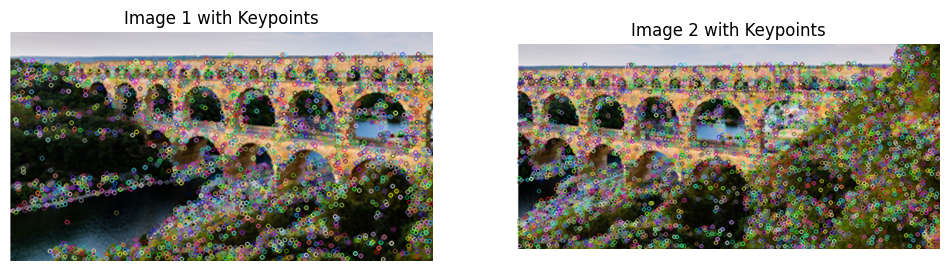

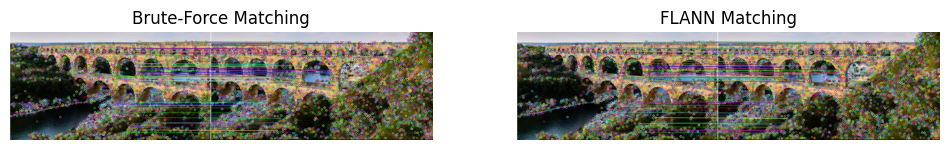

Estimated Homography Matrix:
[[ 9.92185384e-01  4.18390107e-04 -2.27473334e+02]
 [-1.64309303e-03  9.96806688e-01  2.99164650e+00]
 [-8.70789749e-06  1.65127151e-06  1.00000000e+00]]


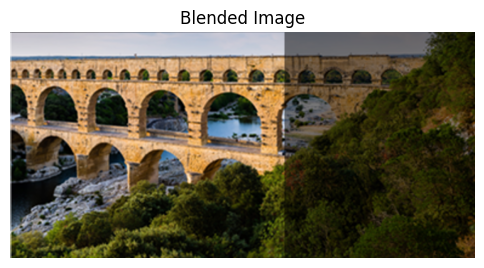

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread(r"C:\Users\DELL\Downloads\one.png")
image2 = cv2.imread(r"C:\Users\DELL\Downloads\two.png")
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

image1_keypoints = cv2.drawKeypoints(image1, keypoints1, None)
image2_keypoints = cv2.drawKeypoints(image2, keypoints2, None)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 1 with Keypoints')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 2 with Keypoints')
plt.axis('off')
plt.show()

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches_bf = bf.match(descriptors1, descriptors2)

matches_bf = sorted(matches_bf, key=lambda x: x.distance)

num_matches = 50
image_matches_bf = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches_bf[:num_matches], None)

index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches_flann = flann.match(descriptors1, descriptors2)

matches_flann = sorted(matches_flann, key=lambda x: x.distance)

image_matches_flann = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches_flann[:num_matches], None)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_matches_bf, cv2.COLOR_BGR2RGB))
plt.title('Brute-Force Matching')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_matches_flann, cv2.COLOR_BGR2RGB))
plt.title('FLANN Matching')
plt.axis('off')
plt.show()

src_points = np.float32([keypoints1[m.queryIdx].pt for m in matches_bf]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints2[m.trainIdx].pt for m in matches_bf]).reshape(-1, 1, 2)

homography, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

print("Estimated Homography Matrix:")
print(homography)

result = cv2.warpPerspective(image1, homography, (image2.shape[1], image2.shape[0]))

alpha = 0.5  # blending factor
blended_image = cv2.addWeighted(result, alpha, image2, 1 - alpha, 0)
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.title('Blended Image')
plt.axis('off')
plt.show()


# reducing blending factor to 0.1

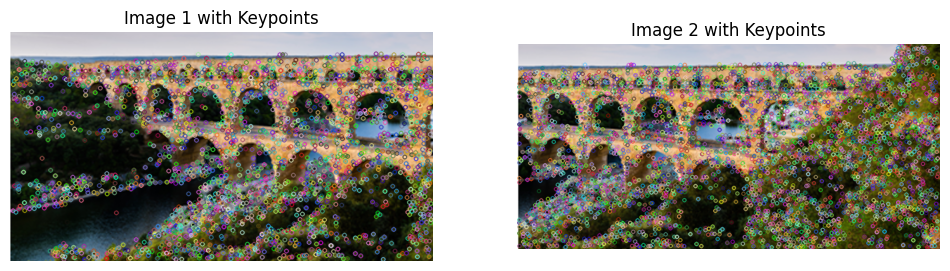

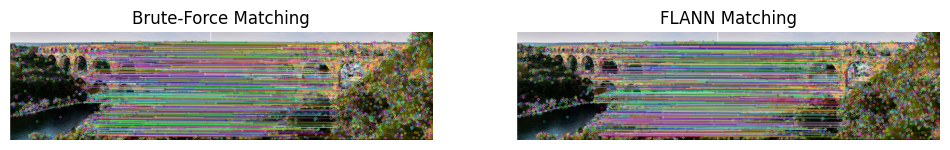

Estimated Homography Matrix:
[[ 9.92185384e-01  4.18390107e-04 -2.27473334e+02]
 [-1.64309303e-03  9.96806688e-01  2.99164650e+00]
 [-8.70789749e-06  1.65127151e-06  1.00000000e+00]]


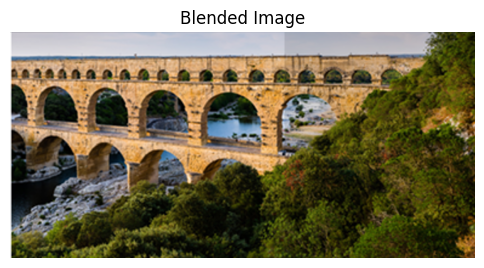

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1 = cv2.imread(r"C:\Users\DELL\Downloads\one.png")
image2 = cv2.imread(r"C:\Users\DELL\Downloads\two.png")

gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

image1_keypoints = cv2.drawKeypoints(image1, keypoints1, None)
image2_keypoints = cv2.drawKeypoints(image2, keypoints2, None)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 1 with Keypoints')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 2 with Keypoints')
plt.axis('off')
plt.show()

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches_bf = bf.match(descriptors1, descriptors2)

matches_bf = sorted(matches_bf, key=lambda x: x.distance)

num_matches = 1000
image_matches_bf = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches_bf[:num_matches], None)

index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches_flann = flann.match(descriptors1, descriptors2)
matches_flann = sorted(matches_flann, key=lambda x: x.distance)

image_matches_flann = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches_flann[:num_matches], None)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_matches_bf, cv2.COLOR_BGR2RGB))
plt.title('Brute-Force Matching')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_matches_flann, cv2.COLOR_BGR2RGB))
plt.title('FLANN Matching')
plt.axis('off')
plt.show()

src_points = np.float32([keypoints1[m.queryIdx].pt for m in matches_bf]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints2[m.trainIdx].pt for m in matches_bf]).reshape(-1, 1, 2)

homography, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

print("Estimated Homography Matrix:")
print(homography)

result = cv2.warpPerspective(image1, homography, (image2.shape[1], image2.shape[0]))

alpha = 0.11  # blending factor
blended_image = cv2.addWeighted(result, alpha, image2, 1 - alpha, 0)
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.title('Blended Image')
plt.axis('off')
plt.show()
